# Sistema de Recomendação Simples usando Pandas e Numpy

## CONTENT BASED FILTERING

Content based filtering utiliza apenas características dos filmes para fazer recomendações. No nosso caso, utilizaremos a "popularidade" dos filmes, sendo polularidade a quantidade de votos e a média de avaliação dos filmes

In [10]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lendo os dados
movie = pd.read_csv("../data/movies.csv")
rating = pd.read_csv("../data/ratings.csv").drop("timestamp", axis = 1)

In [11]:
movie.loc[movie.movieId == 53322]

,movieId,title,genres
6497,53322,Ocean's Thirteen (2007),Crime|Thriller


In [24]:
# Transformamos o id dos filmes no indice da tabela para facilitar o acesso
movie = movie.set_index("movieId")
movie

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [25]:
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [26]:
# Exibindo características do dataset
rating_qtd = rating.rating.count()
userId_qtd = len(rating.userId.unique())
movieId_qtd = len(rating.movieId.unique())

print(f"Quantidade de usuários: { userId_qtd }")
print(f"Quantidade de filmes: { movieId_qtd }")
print(f"Quantidade de avaliações: { rating_qtd }")


Quantidade de usuários: 610
Quantidade de filmes: 9724
Quantidade de avaliações: 100836


In [27]:
# Criando colunas com quantidade de votos e média de notas para cada filme
votos = rating.movieId.value_counts()

media = rating[['movieId', 'rating']].groupby("movieId").mean()
media.columns = ['media_rating']
media.sort_values(by= "media_rating", ascending=False)

,media_rating
movieId,
88448,5.0
100556,5.0
143031,5.0
143511,5.0
143559,5.0
...,...
157172,0.5
85334,0.5
53453,0.5


In [28]:
# Adicionamos as colunas e ordenamos por elas
movie['votos'] = votos
movie['media_nota'] = media
movie = movie.sort_values(by=["votos", "media_nota"], ascending=False)
movie

,title,genres,votos,media_nota
movieId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN


In [29]:
movie["votos"].describe().apply(lambda x: round(x, 2))

count    9724.00
mean       10.37
std        22.40
min         1.00
25%         1.00
50%         3.00
75%         9.00
max       329.00
Name: votos, dtype: float64

In [30]:
rating.rating.describe().apply(lambda x: round(x, 2))

count    100836.00
mean          3.50
std           1.04
min           0.50
25%           3.00
50%           3.50
75%           4.00
max           5.00
Name: rating, dtype: float64

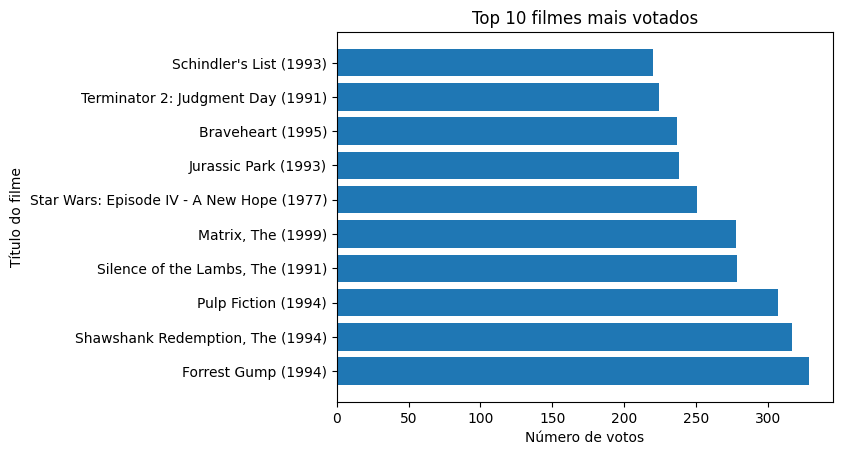

In [31]:
# Fazendo algumas plotagens
quantidade = 10

fig, ax = plt.subplots()
ax.barh(movie.title[:quantidade], movie.votos.values[:quantidade])
plt.xlabel('Número de votos')
plt.ylabel('Título do filme')
plt.title('Top 10 filmes mais votados')
plt.show()

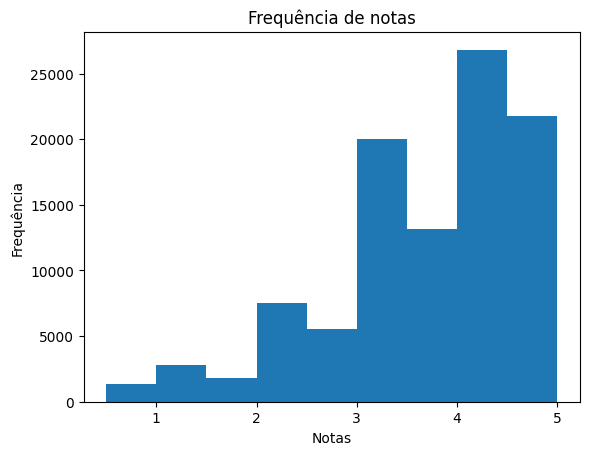

In [32]:
# Histograma com a frequência de notas
bins = int((rating.rating.max() - rating.rating.min()) / 0.5)

plt.hist(x = rating.rating, bins = bins)
plt.xlabel('Notas')
plt.ylabel("Frequência")
plt.title("Frequência de notas")
plt.show()

In [33]:
# Restringindo o filme para que as recomendações levem em conta apenas filmes com no mínimo 100 votos
# para o nosso content based filtering, essas seriam as recomendações generalistas para um usuário, baseado apenas na polularidade dos filmes
movie.loc[movie.votos >= 100]

,title,genres,votos,media_nota
movieId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
...,...,...,...,...
434,Cliffhanger (1993),Action|Adventure|Thriller,101.0,3.034653
912,Casablanca (1942),Drama|Romance,100.0,4.240000
44191,V for Vendetta (2006),Action|Sci-Fi|Thriller|IMAX,100.0,3.885000


## Collaborative filtering

O filtro colaborativo é mais poderoso e consegue fazer recomendações de filmes com base em outros filmes que o usuário gostou e também recomendar filmes que usuáriois parecidos com ele gostaram

In [34]:
# Distância euclidiana
def distance(x, y):
    return np.linalg.norm(x - y)

# Calcula a distância entre dois usuários no espaço vetorial
def distance_users(id1, id2, minimo = 5):
    user1 = rating_user(id1)
    user2 = rating_user(id2)
    users = user1.join(user2, how='inner', lsuffix='_user1', rsuffix='_user2')
    if len(users) < minimo:
        return (id1, id2, 100)
    info = distance(users.rating_user1, users.rating_user2)
    return (id1, id2, info)

# Calcula a distância entre um determinado usuário e todos os outros usuários
def one_vs_all(id):
    lista = [distance_users(id, user) for user in rating.userId.unique()]
    df = pd.DataFrame(lista, columns=["one", "all", "distance"])
    return df
    
# Retorna os usuários mais próximos do usuário especificado
def closer(id1):
    info = one_vs_all(id1)
    info = info.sort_values(by="distance", ascending=True)
    info = info.set_index("all").drop(id1, axis = 0)
    return info

def rating_user(id):
    return rating.loc[rating.userId == id][["movieId", "rating"]].set_index("movieId")

def recomendation(id1, subset = None):
    rating_id1 = rating_user(id1)
    watched_movies = rating_id1.index

    closest = closer(id1, subset = subset)
    closest = closest.iloc[0].name
    closest_rating = rating_user(closest)
    closest_rating = closest_rating.drop(watched_movies, errors="ignore")
    recomends = closest_rating.sort_values("rating", ascending=False)
    return recomends.join(movie)

In [35]:
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [36]:
# Buscamos os filmes assistidos e as notas atribuidas a cada filme para os usuarios com id 1 e 4
usuario1 = rating_user(1)
usuario4 = rating_user(4)

In [37]:
usuario1.head()

,rating
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [38]:
# Aqui selecionamos os filmes que ambos os usuários 1 e 4 assistiram e calculamos a distância entre eles
usuarios = usuario1.join(usuario4, how='inner', lsuffix='_user1', rsuffix='_user4')
print(f"Distância entre usuário1 e usuario4: {round(distance(usuarios.rating_user1, usuarios.rating_user4), 2)}\n\n {usuarios}")

Distância entre usuário1 e usuario4: 11.14

          rating_user1  rating_user4
movieId                            
47                5.0           2.0
235               4.0           2.0
260               5.0           5.0
296               3.0           1.0
441               4.0           1.0
457               5.0           5.0
553               5.0           2.0
593               4.0           5.0
608               5.0           5.0
648               3.0           3.0
919               5.0           5.0
1025              5.0           4.0
1060              4.0           2.0
1073              5.0           4.0
1080              5.0           5.0
1136              5.0           5.0
1196              5.0           5.0
1197              5.0           5.0
1198              5.0           3.0
1213              5.0           4.0
1219              2.0           4.0
1265              4.0           4.0
1282              5.0           5.0
1291              5.0           4.0
1500              4

### One vs all

In [39]:
usuario1 = one_vs_all(1)

In [40]:
# Os usuários mais parecidos com o usuário 1, ordenados pela distância entre eles
usuario1.loc[usuario1.distance < 100].sort_values(by='distance', ascending=True)

,one,all,distance
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
257,1,258,1.000000
...,...,...,...
473,1,474,18.594354
159,1,160,18.794946
216,1,217,19.646883
598,1,599,19.665960


In [41]:
def closer(id1):
    info = one_vs_all(id1)
    info = info.sort_values(by="distance", ascending=True)
    info = info.set_index("all").drop(id1, axis = 0)
    return info

In [42]:
# Exibindo os usuários mais próximos do usuário 5, com exceção dele mesmo
closer(5)

,one,distance
all,,
152,5,1.414214
399,5,1.500000
125,5,1.581139
503,5,1.732051
493,5,1.732051
...,...,...
98,5,100.000000
355,5,100.000000
351,5,100.000000


### Recomendando pelo usuário mais parecido

In [43]:
def rating_user(id):
    return rating.loc[rating.userId == id][["movieId", "rating"]].set_index("movieId")

def distance_users(id1, id2, minimo = 5):
    user1 = rating_user(id1)
    user2 = rating_user(id2)
    users = user1.join(user2, how='inner', lsuffix='_user1', rsuffix='_user2')
    if len(users) < minimo:
        return None

    info = distance(users.rating_user1, users.rating_user2)
    return (id1, id2, info)

def one_vs_all(id, subset = None):
    user_rating = rating.userId.unique()
    if subset:
        user_rating = user_rating[:subset]
    lista = [distance_users(id, user) for user in user_rating]
    lista = list(filter(None, lista))
    df = pd.DataFrame(lista, columns=["one", "all", "distance"])
    return df

def closer(id1, subset = None):
    info = one_vs_all(id1, subset)
    info = info.sort_values(by="distance", ascending=True)
    info = info.set_index("all").drop(id1, axis = 0)
    return info
    
def recomendation(id1, subset = None):
    rating_id1 = rating_user(id1)
    watched_movies = rating_id1.index

    closest = closer(id1, subset = subset)
    closest = closest.iloc[0].name
    closest_rating = rating_user(closest)
    closest_rating = closest_rating.drop(watched_movies, errors="ignore")
    recomends = closest_rating.sort_values("rating", ascending=False)
    return recomends.join(movie)

In [44]:
# Top 5 filmes recomandados para o usuário 5
recomendation(5).head()

,rating,title,genres,votos,media_nota
movieId,,,,,
47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203.0,3.975369
2329,5.0,American History X (1998),Crime|Drama,129.0,4.217054
69481,5.0,"Hurt Locker, The (2008)",Action|Drama|Thriller|War,34.0,4.058824
750,5.0,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
858,5.0,"Godfather, The (1972)",Crime|Drama,192.0,4.289062


### Recomendando baseado nos usuários mais parecidos

In [45]:
def closer(id1, subset = None, k_closest = 10):
    info = one_vs_all(id1, subset)
    info = info.sort_values(by="distance", ascending=True)
    info = info.set_index("all").drop(id1, axis = 0)
    return info.head(k_closest)

def recomendation(id1, subset = None, k_closest = 10): # KNN
    rating_id1 = rating_user(id1)
    watched_movies = rating_id1.index

    closest = closer(id1, subset = subset, k_closest = k_closest)
    closest_users = closest.index 
    closest_rating = rating.set_index("userId").loc[closest_users]

    recommends = closest_rating.groupby("movieId").mean()[["rating"]]
    recommends = recommends.sort_values("rating", ascending=False)
    return recommends.join(movie)

In [46]:
# Esses são os usuários mais parecidos com o usuário 5
closer(5, k_closest=10)

,one,distance
all,,
152,5,1.414214
399,5,1.500000
125,5,1.581139
493,5,1.732051
503,5,1.732051
203,5,1.732051
297,5,1.732051
227,5,1.936492
62,5,2.000000


In [47]:
# Recomendações feitas com base nos 10 usuários mais parecidos
recomendation(5, k_closest=10)

,rating,title,genres,votos,media_nota
movieId,,,,,
1584,5.0,Contact (1997),Drama|Sci-Fi,82.0,3.652439
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
6934,5.0,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,79.0,3.151899
2321,5.0,Pleasantville (1998),Comedy|Drama|Fantasy,61.0,3.483607
53322,5.0,Ocean's Thirteen (2007),Crime|Thriller,33.0,3.484848
...,...,...,...,...,...
227,1.0,Drop Zone (1994),Action|Thriller,22.0,2.863636
63992,1.0,Twilight (2008),Drama|Fantasy|Romance|Thriller,22.0,2.409091
93270,0.5,Project X (2012),Comedy,8.0,2.062500
